小提醒 : 下面Model為了比對建立了很多個，但實際上只有寫一個就可以了(避免重複訓練)

In [1]:
import glob
import pandas as pd

#先把貓圖片路徑存在變數paths中
paths = glob.glob("EWtransfer_lr_data/cat.*.jpg")
print('paths現在型態是:', type(paths))
paths #有一堆貓圖片的路徑

paths現在型態是: <class 'list'>


['EWtransfer_lr_data\\cat.0.jpg',
 'EWtransfer_lr_data\\cat.1.jpg',
 'EWtransfer_lr_data\\cat.10.jpg',
 'EWtransfer_lr_data\\cat.100.jpg',
 'EWtransfer_lr_data\\cat.1000.jpg',
 'EWtransfer_lr_data\\cat.10000.jpg',
 'EWtransfer_lr_data\\cat.10001.jpg',
 'EWtransfer_lr_data\\cat.10002.jpg',
 'EWtransfer_lr_data\\cat.10003.jpg',
 'EWtransfer_lr_data\\cat.10004.jpg',
 'EWtransfer_lr_data\\cat.10005.jpg',
 'EWtransfer_lr_data\\cat.10006.jpg',
 'EWtransfer_lr_data\\cat.10007.jpg',
 'EWtransfer_lr_data\\cat.10008.jpg',
 'EWtransfer_lr_data\\cat.10009.jpg',
 'EWtransfer_lr_data\\cat.1001.jpg',
 'EWtransfer_lr_data\\cat.10010.jpg',
 'EWtransfer_lr_data\\cat.10011.jpg',
 'EWtransfer_lr_data\\cat.10012.jpg',
 'EWtransfer_lr_data\\cat.10013.jpg',
 'EWtransfer_lr_data\\cat.10014.jpg',
 'EWtransfer_lr_data\\cat.10015.jpg',
 'EWtransfer_lr_data\\cat.10016.jpg',
 'EWtransfer_lr_data\\cat.10017.jpg',
 'EWtransfer_lr_data\\cat.10018.jpg',
 'EWtransfer_lr_data\\cat.10019.jpg',
 'EWtransfer_lr_data\\cat.1

In [2]:
#設一個空 DataFrame等一下接剛抓下來的貓圖片路徑
catdf = pd.DataFrame(columns=["path", "target"])
catdf["path"] = paths
catdf["target"] = 0
# 標記貓的圖片
catdf

,path,target
0,EWtransfer_lr_data\cat.0.jpg,0
1,EWtransfer_lr_data\cat.1.jpg,0
2,EWtransfer_lr_data\cat.10.jpg,0
3,EWtransfer_lr_data\cat.100.jpg,0
4,EWtransfer_lr_data\cat.1000.jpg,0
...,...,...
12495,EWtransfer_lr_data\cat.9995.jpg,0
12496,EWtransfer_lr_data\cat.9996.jpg,0
12497,EWtransfer_lr_data\cat.9997.jpg,0
12498,EWtransfer_lr_data\cat.9998.jpg,0


In [3]:
# 一樣的動作標記狗
paths = glob.glob("EWtransfer_lr_data/dog.*.jpg")
dogdf = pd.DataFrame(columns=["path", "target"])
dogdf["path"] = paths
dogdf["target"] = 1
dogdf

,path,target
0,EWtransfer_lr_data\dog.0.jpg,1
1,EWtransfer_lr_data\dog.1.jpg,1
2,EWtransfer_lr_data\dog.10.jpg,1
3,EWtransfer_lr_data\dog.100.jpg,1
4,EWtransfer_lr_data\dog.1000.jpg,1
...,...,...
12495,EWtransfer_lr_data\dog.9995.jpg,1
12496,EWtransfer_lr_data\dog.9996.jpg,1
12497,EWtransfer_lr_data\dog.9997.jpg,1
12498,EWtransfer_lr_data\dog.9998.jpg,1


In [4]:
# pd.concat把DataFrame合體
# 把要合體的DataFrame組成一個大list
# ignore_index設定True，丟掉原本的列標籤生成新的列標籤索引
traindf = pd.concat([catdf, dogdf], ignore_index=True)
traindf

,path,target
0,EWtransfer_lr_data\cat.0.jpg,0
1,EWtransfer_lr_data\cat.1.jpg,0
2,EWtransfer_lr_data\cat.10.jpg,0
3,EWtransfer_lr_data\cat.100.jpg,0
4,EWtransfer_lr_data\cat.1000.jpg,0
...,...,...
24995,EWtransfer_lr_data\dog.9995.jpg,1
24996,EWtransfer_lr_data\dog.9996.jpg,1
24997,EWtransfer_lr_data\dog.9997.jpg,1
24998,EWtransfer_lr_data\dog.9998.jpg,1


#### 來試著移植VGG16

In [5]:
from keras.applications.vgg16 import VGG16
from keras.models import Model #Model比較彈性
#另一種from keras.models import Sequential的Sequential是一層一層疊

from keras.layers import Dense, Flatten, Dropout
from keras.layers import BatchNormalization
                                          #weights = "imagenet"是預設 不寫也沒關係
vgg = VGG16(include_top=False, weights = "imagenet", input_shape=(224, 224, 3))

x = Flatten()(vgg.output) #這行語法看起來很怪 也是一個tensor 用一個變x數接攤平後vgg的output

cnn = Model(inputs = vgg.input, outputs=x) # vgg的output之後(flatten之後)就是接全連階層
cnn.summary() #看到最後攤平後25088有點大，希望等一下每層Dense都慢慢減少神經元

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
vgg.input #vgg.input 是一個tensor

In [ ]:
vgg.output #vgg.input 也是一個tensor

In [ ]:
vgg.layers

In [6]:
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

# 跟Sequential()慢慢疊的比起來 ，這個Model()寫法要熟悉一下
# BatchNormalization這步很重要，進MLP之前批標準化(重新標準化)
x = BatchNormalization()(vgg.output) #他是移植vgg後的第一個動作 所以要接(vgg.output)
x = Flatten()(x)  #要進MLP了 所以攤平
x = Dense(2048, activation="relu")(x) #這幾行都是 某tensor丟給x，用x自己接 變成新的tensor 
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(units = 2, activation="softmax")(x)  #設activation="softmax" 目前是2選1 所以units = 2
# 也可以寫activation="sigmoid" , units = 1
cnn = Model(inputs = vgg.input, outputs=x)
cnn.summary()

# 下一塊有訓練更快的方法

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [7]:
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

# 這步一定要在模型確定前，就是做(模型.compile)之前就寫 
# 滑到最上面回憶一下 當初移植VGG的時候有設定include_top=False 沒有移植VGG的全連接層 只有移植VGG的CNN部分
for l in vgg.layers:  #vgg.layers就是把每一層(vgg只有CNN部分)當成一個list
    l.trainable = False # trainable這個屬性會決定這層要不要訓練，都固定False
        
# BatchNormalization這步很重要，進MLP之前批標準化(重新標準化)
x = BatchNormalization()(vgg.output)  #他是移植vgg後的第一個動作 所以要接(vgg.output)
x = Flatten()(x)   #要進MLP了 所以攤平
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(2, activation="softmax")(x)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()
#跟樓上比對一下 Non-trainable params ，減少了前面CNN卷積的訓練

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [8]:
#確定模型怎麼訓練
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [9]:
# 把要傳進去的資料 題目和答案都轉成numpy array
import numpy as np
x = np.array(traindf["path"]) # x 目前還只是路徑 
y = np.array(traindf["target"])

# scikit-learn 要做資料切分
from sklearn.model_selection import train_test_split #很常用

# [90%x, 10%x, 90%y, 10%y] 記得那4個變數接 接完可以一個一個檢查一下
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.1)

In [10]:
print(x_train.shape)
print(x_test.shape) # 此時的x_train，x_test還只是圖片的路徑
print(y_train.shape)
print(y_test.shape)

(22500,)
(2500,)
(22500,)
(2500,)


In [13]:
# 答案 Y 記得轉成onehot-encoding
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

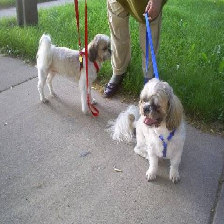

In [15]:
# PIL: Pillow 
from keras.preprocessing.image import load_img   #會把路徑轉成圖片

# 抓第一張圖來實驗
img = load_img(x_train[0], target_size=(224, 224, 3))
img #因為上面有做資料切分 所以每個人的第一張圖片應該都不一樣 跑出來的圖也不一樣

In [16]:
np.array(img) # 原本圖片的矩陣

array([[[135, 155, 106],
        [129, 149,  96],
        [139, 160, 104],
        ...,
        [126, 173,  79],
        [122, 170,  70],
        [129, 177,  75]],

       [[129, 148, 102],
        [123, 143,  94],
        [119, 139,  86],
        ...,
        [ 93, 139,  49],
        [ 86, 133,  39],
        [103, 150,  54]],

       [[110, 126,  89],
        [117, 134,  92],
        [120, 137,  92],
        ...,
        [ 92, 137,  54],
        [ 81, 126,  43],
        [ 96, 141,  56]],

       ...,

       [[122, 126, 127],
        [122, 126, 127],
        [131, 135, 136],
        ...,
        [106, 110, 121],
        [104, 111, 121],
        [102, 109, 119]],

       [[132, 136, 137],
        [127, 131, 132],
        [126, 130, 131],
        ...,
        [106, 110, 121],
        [106, 113, 123],
        [104, 111, 121]],

       [[128, 132, 133],
        [122, 126, 127],
        [141, 145, 146],
        ...,
        [106, 110, 121],
        [107, 114, 124],
        [105, 112, 122]]

In [17]:
# VGG16的訓練方式 mode是caffe
# caffe:先轉成BGR 沒做縮放 只有平移 (B-mean(B),G-mean(G),R-mean(R))數字通常會在 -120~120之間
from keras.applications.vgg16 import preprocess_input 
#不管移植什麼模型都要跟著移植那個模型處理圖片的方式，不然權重會亂掉(很重要!!)

preprocess_input(np.array(img))
# preprocess_input處理後 和樓上比對

array([[[ 2.0609970e+00,  3.8221001e+01,  1.1320000e+01],
        [-7.9390030e+00,  3.2221001e+01,  5.3199997e+00],
        [ 6.0997009e-02,  4.3221001e+01,  1.5320000e+01],
        ...,
        [-2.4939003e+01,  5.6221001e+01,  2.3199997e+00],
        [-3.3939003e+01,  5.3221001e+01, -1.6800003e+00],
        [-2.8939003e+01,  6.0221001e+01,  5.3199997e+00]],

       [[-1.9390030e+00,  3.1221001e+01,  5.3199997e+00],
        [-9.9390030e+00,  2.6221001e+01, -6.8000031e-01],
        [-1.7939003e+01,  2.2221001e+01, -4.6800003e+00],
        ...,
        [-5.4939003e+01,  2.2221001e+01, -3.0680000e+01],
        [-6.4939003e+01,  1.6221001e+01, -3.7680000e+01],
        [-4.9939003e+01,  3.3221001e+01, -2.0680000e+01]],

       [[-1.4939003e+01,  9.2210007e+00, -1.3680000e+01],
        [-1.1939003e+01,  1.7221001e+01, -6.6800003e+00],
        [-1.1939003e+01,  2.0221001e+01, -3.6800003e+00],
        ...,
        [-4.9939003e+01,  2.0221001e+01, -3.1680000e+01],
        [-6.0939003e+01,  9.2

### 不能跟平常一樣 直接 .fit   ，因為圖片沒有整個讀取進來

In [22]:
batch = 50    # 每看20筆資料做一次梯度下降(調整參數)
train = 10

# 下面的動作做10次
for i in range(train):
    img_list = [] # 叫一個空list等一下接處理後的圖片(矩陣表示)
    
    # 抽20個數字，也就是所有的x_train中 等一下會抽20張圖
    idx = np.random.randint(0, x_train.shape[0], batch) #x_train.shape[0]是x_train有幾'筆'資料 
    for fp in x_train[idx]: # idx是20個亂數，x_train[idx]是用這20個亂數一張一張打圖抓出來，fp是20個路徑
        img = load_img(fp, target_size=(224, 224, 3)) #把路徑讀成圖片(矩陣表示) 順便設定大小
        img_pre = preprocess_input(np.array(img))  # 經過preprocess_input處理後
        img_list.append(img_pre)   # 再慢慢加到剛剛叫的空list，此時矩陣已經是處理後的樣子
    x_train_np = np.array(img_list) # 把處理後的圖片矩陣(題目) 轉成numpy
    #用這200個亂數當索引 直接拿到各自的答案(y_train_cat[idx]都是onehot-encoding) 也轉成numpy
    y_train_np = np.array(y_train_cat[idx]) 
    
    # XX.train_on_batch就是一個批次的訓練，注意batch不要設太大 會當機
    result = cnn.train_on_batch(x_train_np, y_train_np)
    print("-" * 15,'第', i+1, "輪","-" * 15) #左邊15個- (第幾次) 右邊也15個-
    print(result)
# (很上面的complie可以改設定)，報表的第一個是loss，第二個是準確度
# 發現都表現得可能不太好的話 拉去最上面看有沒有加BatchNormalization()，另外在執行這塊一兩次也可以

--------------- 第 1 輪 ---------------
[1.3726157, 0.84]
--------------- 第 2 輪 ---------------
[0.9267696, 0.92]
--------------- 第 3 輪 ---------------
[1.3026068, 0.9]
--------------- 第 4 輪 ---------------
[1.8665092, 0.86]
--------------- 第 5 輪 ---------------
[0.63346267, 0.88]
--------------- 第 6 輪 ---------------
[0.5891408, 0.94]
--------------- 第 7 輪 ---------------
[0.1107411, 0.98]
--------------- 第 8 輪 ---------------
[0.29732585, 0.96]
--------------- 第 9 輪 ---------------
[1.4008483, 0.86]
--------------- 第 10 輪 ---------------
[2.053667, 0.86]


In [23]:
x_train_np.shape

(50, 224, 224, 3)

In [24]:
y_train_np.shape

(50, 2)

In [25]:
batch = 200    # 每看200筆資料做一次梯度下降(調整參數)
test_img_list_ori = [] #先設一個空list等一下放圖原本的矩陣
test_img_list = [] #先設一個空list等一下放圖處理後的矩陣


# 抽200個數字，也就是所有的x_test中 等一下會抽200張圖
idx = np.random.randint(0, x_test.shape[0], batch) #x_test.shape[0]是x_test有幾'筆'資料 

for fp in x_test[idx]: # idx是200個亂數，x_test[idx]是用這200個亂數一張一張打圖抓出來
    img = load_img(fp, target_size=(224, 224, 3)) #把路徑讀成圖片(矩陣表示) 順便設定大小
    test_img_list_ori.append(np.array(img)) # 慢慢加到剛剛叫的空list，此時矩陣還是原本的樣子
    img_pre = preprocess_input(np.array(img)) # 經過preprocess_input處理後
    test_img_list.append(img_pre) # 再慢慢加到剛剛叫的空list，此時矩陣已經是處理後的樣子
x_test_np = np.array(test_img_list)   # test題目
y_test_np = np.array(y_test_cat[idx]) # test真正的答案(onehot-encoding)
y_test_ori = y_test[idx] # test真正的答案(沒有做onehot-encoding)

cnn.evaluate(x_test_np, y_test_np) 
# (很上面的complie可以改設定)，報表的第一個是loss，第二個是準確度

200/200 [==============================] - 3s 17ms/step


[15.99377155303955, 0.7850000262260437]

In [26]:
# Model式的模型只能用 XX.predict 跑出每個類別的機率
# 反觀Sequential是的模型還可以用XX.predict_classes可以直接跑出機率最高的類別(就是判斷的答案)
pre = cnn.predict(x_test_np) 
pre #他有沒有亂猜 像是全部猜一個答案

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.45671467e-14],
       [1.53504447e-13, 1.00000000e+00],
       [1.00000000e+00, 4.64583427e-18],
       [0.00000000e+00, 1.00000000e+00],
       [7.13665358e-23, 1.00000000e+00],
       [1.00000000e+00, 1.43180159e-13],
       [0.00000000e+00, 1.00000000e+00],
       [9.96151865e-01, 3.84816783e-03],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.65578161e-13, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [9.99999166e-01, 8.48826517e-07],
       [9.97120500e-01, 2.87954137e-03],
       [1.00000000e+00, 1.34420439e-24],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.000000

In [27]:
x_test.shape.shape

(200, 2)

### 檢討考卷

In [ ]:
# 最好都先轉成numpy array
import matplotlib.pyplot as plt
%matplotlib inline
# 前行提要:Model式的模型只能用 XX.predict，但不能用XX.predict_classes 才這麼麻煩

# XX.argmax會找最大值的索引，axis=0 這找每行的最大值，axis=-1是找每列的最大值
pre_ori = pre.argmax(axis=-1) #可以分別印出pre和pre_ori比對看看
# 也就是你寫的答案


# 這邊開始都是複製mnist
# test_img_list_ori是一個大list，收集了200張圖(矩陣還是原本的樣子)，再轉numpy。 就是原本題目的樣子
test_img_list_ori = np.array(test_img_list_ori)
y_test_ori = np.array(y_test_ori) #y_test_ori是真正的答案(沒有做onehot-encoding)

# pre_ori是你寫的答案拿去和真正的答案比對，把錯的題號存成變數false_index
false_index = np.nonzero(pre_ori != y_test_ori)[0]
print("到底有幾個預測錯誤:", len(false_index))
false_img = test_img_list_ori[false_index] # 用預測錯誤的索引 抓出你寫錯的題目
ori_label = y_test_ori[false_index]        # 用預測錯誤的索引 抓出你寫錯題目的答案
pre_label = pre_ori[false_index] #回憶:pre_ori是預測的答案(你寫的答案) 
#用預測錯誤的索引 抓出錯的那幾題你寫了什麼答案

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 7))
for (index, img) in enumerate(false_img):
    plt.subplot(height, width, index + 1)
    msg = "[O]:" + str(ori_label[index]) + "[P]:" + str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)